<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Средние-значения" data-toc-modified-id="Средние-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Средние значения</a></span></li><li><span><a href="#Диаграммы-распределения-признаков" data-toc-modified-id="Диаграммы-распределения-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Диаграммы распределения признаков</a></span></li><li><span><a href="#Матрица-корреляции" data-toc-modified-id="Матрица-корреляции-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Матрица корреляции</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Логическая-регрессия" data-toc-modified-id="Логическая-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Логическая регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Дендрограмма" data-toc-modified-id="Дендрограмма-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Дендрограмма</a></span></li><li><span><a href="#Алгоритм-K-Mean" data-toc-modified-id="Алгоритм-K-Mean-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Алгоритм K-Mean</a></span></li><li><span><a href="#Распределения-признаков-для-кластеров" data-toc-modified-id="Распределения-признаков-для-кластеров-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Распределения признаков для кластеров</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-доработок" data-toc-modified-id="Чек-лист-доработок-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Чек-лист доработок</a></span></li><li><span><a href="#Чек-лист-доработок-v2" data-toc-modified-id="Чек-лист-доработок-v2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Чек-лист доработок v2</a></span></li></ul></li></ul></div>

# Анализ клиентов фитнес-клаба

Наша задача — провести анализ клиентов фитнес-клуба на предмет из возможного ухода.
Для этого:
* будем прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформируем типичные портреты клиентов: выделим несколько наиболее ярких групп и охарактизуем их основные свойства;
* проанализируем основные признаки, наиболее сильно влияющие на отток;
* сформулируем основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.

## Загрузка данных

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# чтение файла  данных
gym = pd.read_csv('/datasets/gym_churn.csv') 

## Анализ данных

In [3]:
# создаем функцию для автоматизации просмотра основных сведений
def information(df):
    return(
    df.info(),
    display('5 cлучайных строк', df.sample(5)),
    display('Статистика данных', df.describe()),
    display('Процент пропусков', round(df.isna().mean()*100, 1)),
    display('Количество дубликатов', df.duplicated().sum())
    )

In [4]:
information(gym)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


'5 cлучайных строк'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2226,1,1,1,0,1,6,0,27,180.676788,5.0,2,0.478517,0.335280,0
2089,0,1,0,0,1,1,1,32,124.317611,1.0,2,1.609212,1.468146,0
86,1,1,1,0,1,12,1,30,251.428594,11.0,4,1.173748,1.297812,0
2344,1,1,1,1,1,12,0,30,221.216191,12.0,9,0.000000,0.046870,0
3347,1,1,1,0,1,6,1,24,115.685748,6.0,1,2.611797,1.276030,1


'Статистика данных'

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


'Процент пропусков'

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

'Количество дубликатов'

0

(None, None, None, None, None)

Наши данные содержат следующую информацию:  
'Churn' — факт оттока в текущем месяце;  

Данные клиента за предыдущий до проверки факта оттока месяц:  
'gender' — пол;  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
'Partner' — сотрудник компании-партнёра клуба;  
'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» ;  
'Phone' — наличие контактного телефона;  
'Age' — возраст;  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
'Group_visits' — факт посещения групповых занятий;  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  


В данных нет пропусков и дубликатов, форматы данных верные.

### Средние значения

Рассмотрим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [5]:
gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


По средним значениям параметров можем сказать, что клиенты с близкой локацией к клубу реже попадают в отток. Средняя длительность действующего абонемента для клиентов подверженных оттоку - 1,7 месяцев, а для тех, кто остается клиентом клуба - 5,7 месяцев. Более молодые клиенты клуба чаще закрывают абонемент. 

### Диаграммы распределения признаков

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
Будем рассматривать диаграммы по следующим прзнакам: 'gender', 'Near_Location', 'Partner' ,'Promo_friends' ,'Phone' 'Age', 'Lifetime'

In [6]:
#список столбцов
hist_colunms = [ 'gender', 'Near_Location', 'Partner' ,'Promo_friends' ,'Phone', 'Age', 'Lifetime']

end


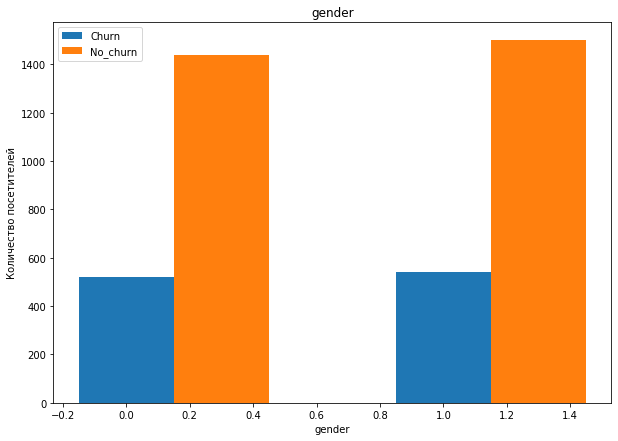

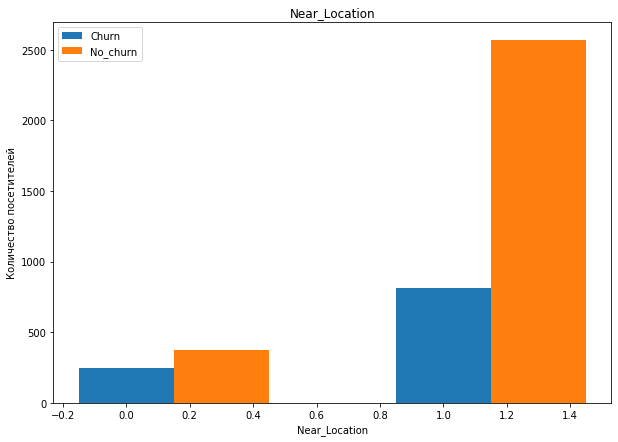

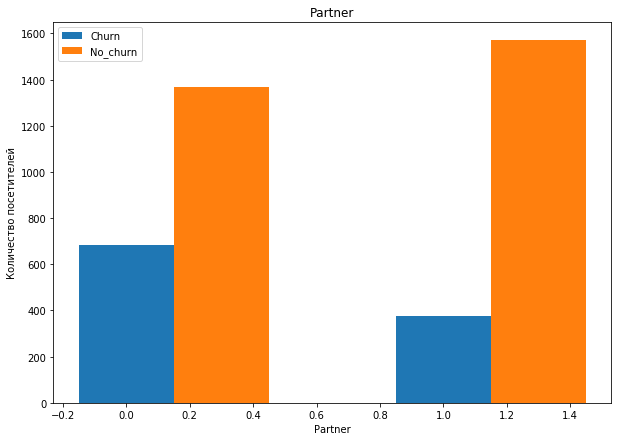

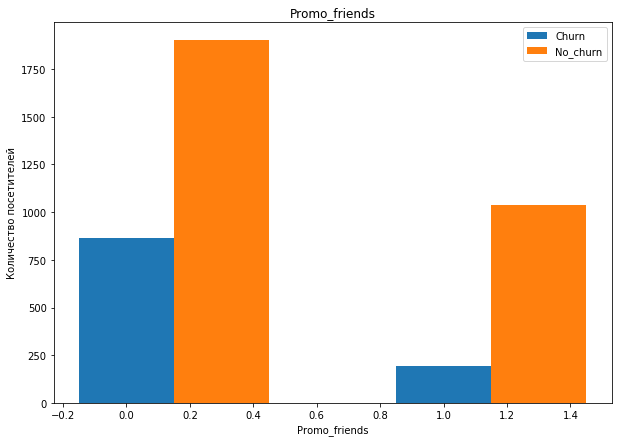

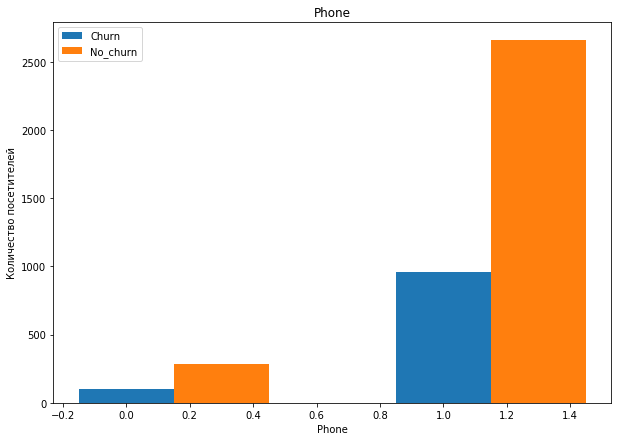

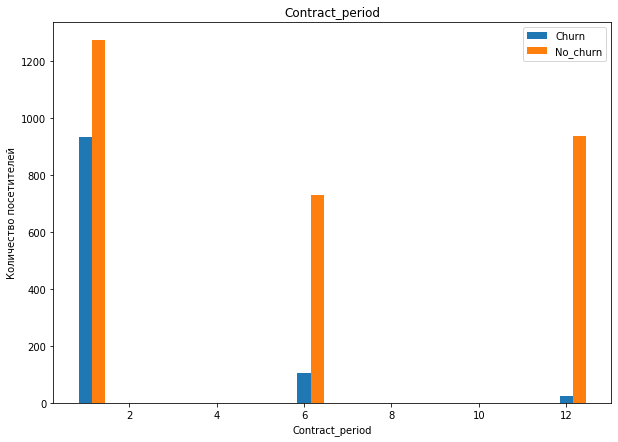

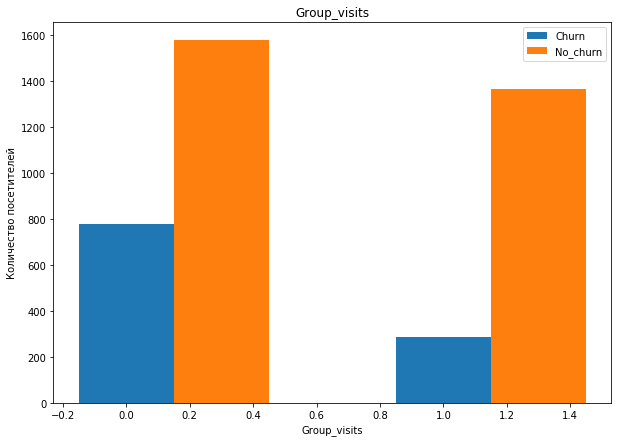

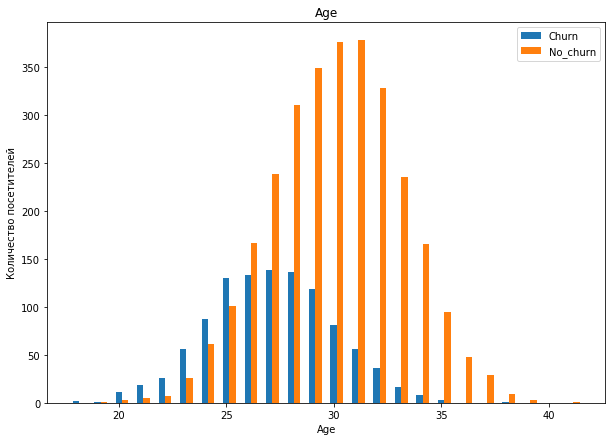

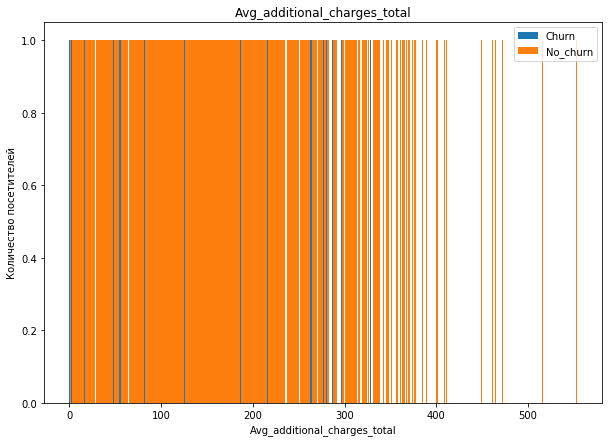

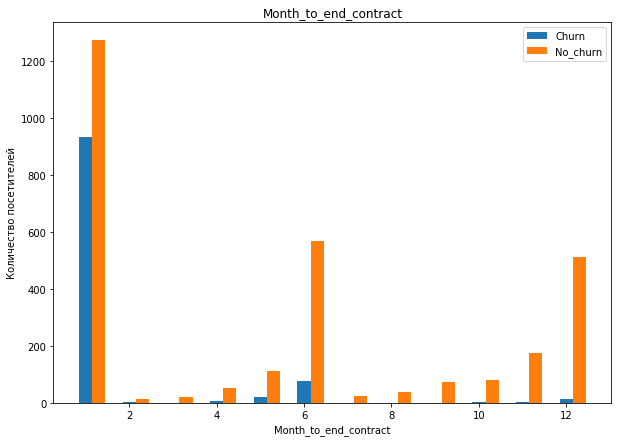

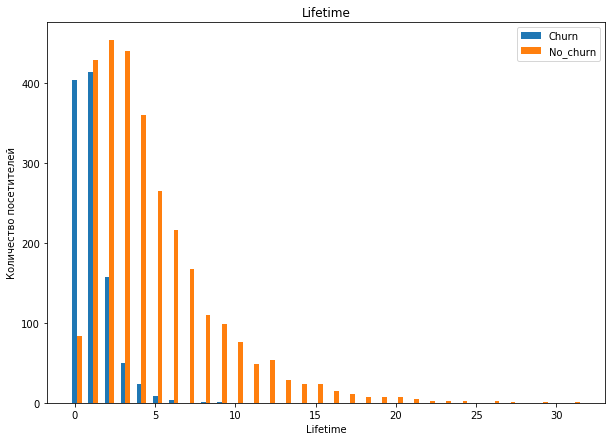

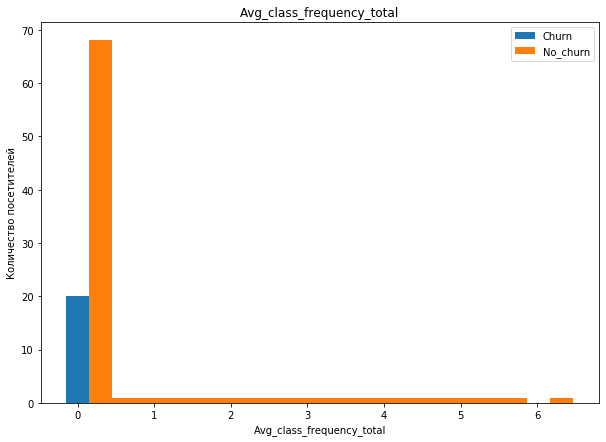

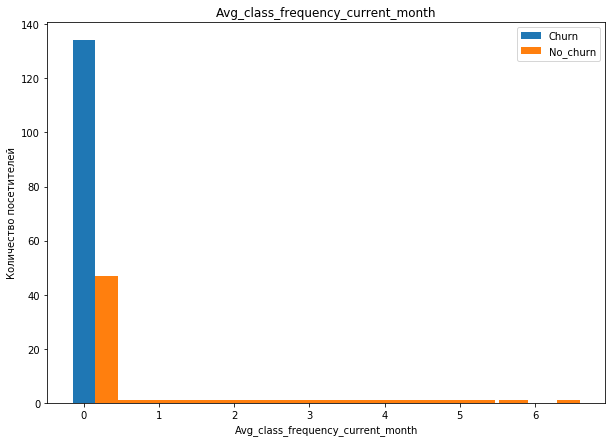

In [7]:
# Цикл для построения диаграмм

for column in gym.columns:
    if (column != 'Churn'):
#for element in hist_colunms:
        bar_width = 0.3
        plt.figure(figsize=(10,7))
        churn = gym.query('Churn == "1"').groupby(column)['Churn'].count().reset_index()
        #total = gym.groupby(column)['Churn'].count().reset_index()    
        no_churn = gym.query('Churn == "0"').groupby(column)['Churn'].count().reset_index()   

        plt.bar(churn[column], churn['Churn'], bar_width, label='Churn')
        plt.bar(no_churn[column] + bar_width, no_churn['Churn'], bar_width, label='No_churn')

        plt.legend()
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Количество посетителей')
        plt.show
    else:
        print('end')

Отдельно рассмотрим распределение признака 'Avg_additional_charges_total'

In [8]:
churn1 = gym.query('Churn == "1"')
churn0 = gym.query('Churn == "0"')

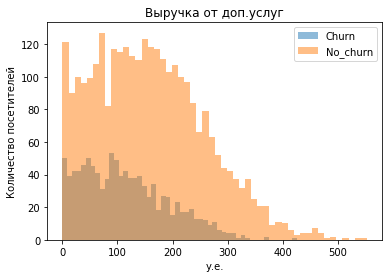

In [9]:
plt.hist(churn1['Avg_additional_charges_total'], bins= 50, alpha=0.5, label='Churn')
plt.hist(churn0['Avg_additional_charges_total'], bins= 50, alpha=0.5, label='No_churn')
plt.legend()
plt.title('Выручка от доп.услуг')
plt.xlabel('y.e.')
plt.ylabel('Количество посетителей')
plt.show()

По признаку 'gender' мы можем сказать, что мужчины и женщины одинаково прекращают посещение фитнес-клуба. Клиенты, которые  проживают или работают в районе, где находится фитнес-центр реже прекращают посещение. Принадележность клиента к группе 'Partner' — сотрудник компании-партнёра клуба и факт первоначальной записи в рамках акции «приведи друга» также повышает его вероятность продлить абонемент. 
Средний возраст клиентов, которые прекращают обслуживание, несколько ниже тек, кто продляет абонемент. Показатель 'Lifetime' для клиентов, которые прекращают обслуживание в среднем равен 4 месяцам.

### Матрица корреляции

In [10]:
#матрица корреляции
corr = gym.corr()

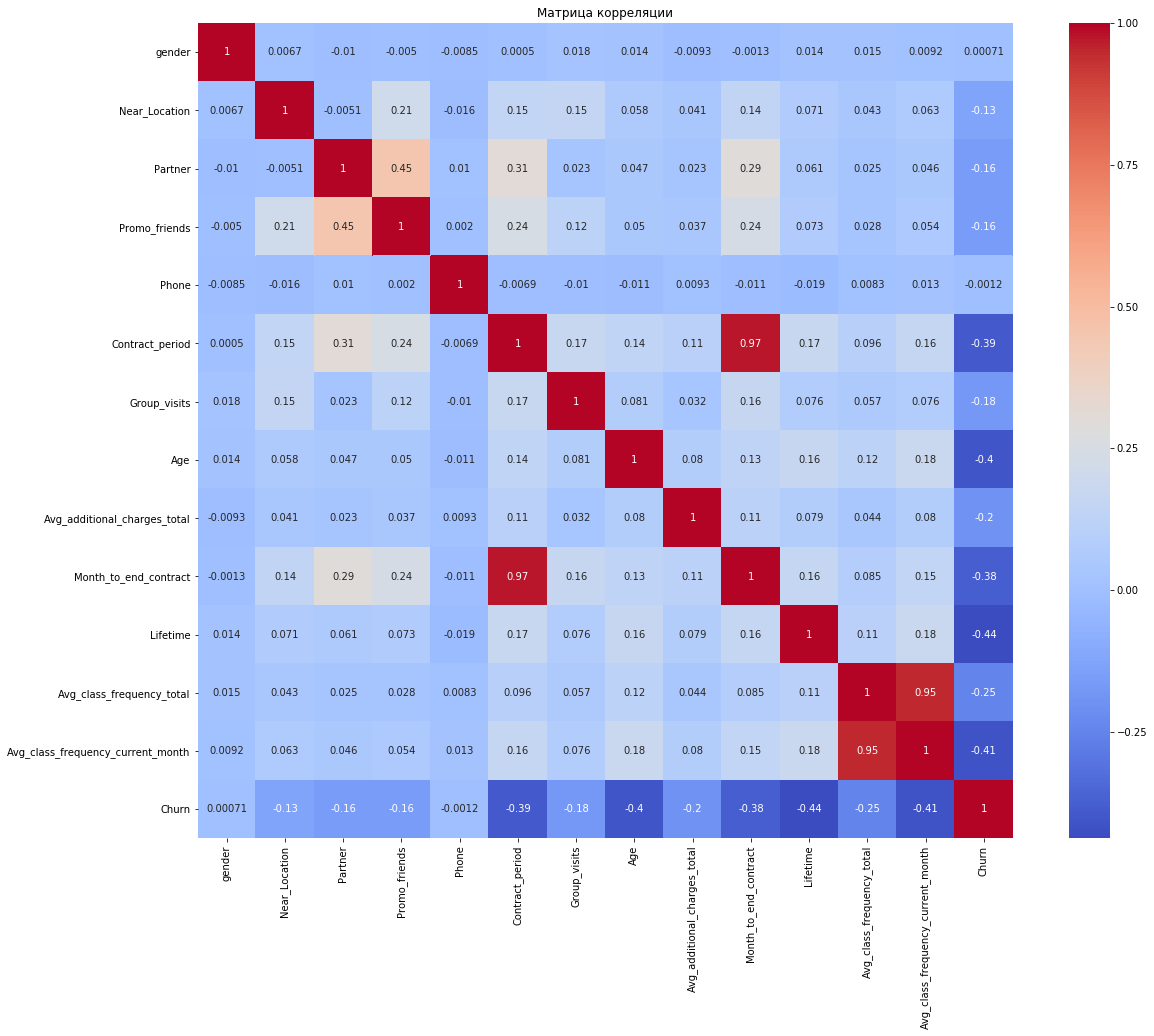

In [11]:
# нарисуем heatmap
plt.figure()
figsize = (20,20)
sns.heatmap(corr, square = True, annot = True, cmap="coolwarm")
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.title('Матрица корреляции')
plt.show()

По матрице корреляции мы видим, что высокий индекс корреляции между параметрами: 'Partner' — сотрудник компании-партнёра клуба и Promo_friends — факт первоначальной записи в рамках акции «приведи друга». Очевидна высокая взаимосвязь между длительностью абонемента и сроком его окончания. Также высокая взаимосвязь между средней частотой посещений в неделю за все время и за предыдущий месяц.  
Для параметра Churn все другие параметры показывают отрицательную взаимосвязь. 

In [12]:
# Удалем высококоррелируемые признаки
gym.drop('Month_to_end_contract', axis = 1, inplace = True)
gym.drop('Avg_class_frequency_current_month', axis = 1, inplace = True)

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце
Обучим модель двумя способами:

* Логическая регрессия
* Случайный лес


Оценим следующие метрики:
* Доля правильных ответов (англ. accuracy)
* Точность (англ. precision)
* полнота (англ. recall)


In [13]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


### Логическая регрессия

In [14]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# алгоритм для нашей модели
model = LogisticRegression(solver='liblinear') 

# обучение модель
model.fit(X_train, y_train)

# прогнозы
lr_predictions = model.predict(X_test)
lr_probabilities = model.predict_proba(X_test)[:,1] 


In [15]:
# метрики для линейной регрессии
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.83
	Recall: 0.80


### Случайный лес

In [16]:
#StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
 
# Преобразование обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [17]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:',
)

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.81
	Recall: 0.79


**Вывод:**  
Модель логической регрессии показала лучший результат по метрике доли правильных ответов, точности и полноте

## Кластеризация клиентов

### Дендрограмма

In [18]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
x_sc = sc.fit_transform(gym.drop(columns = ['Churn']))

linked = linkage(x_sc, method = 'ward') 

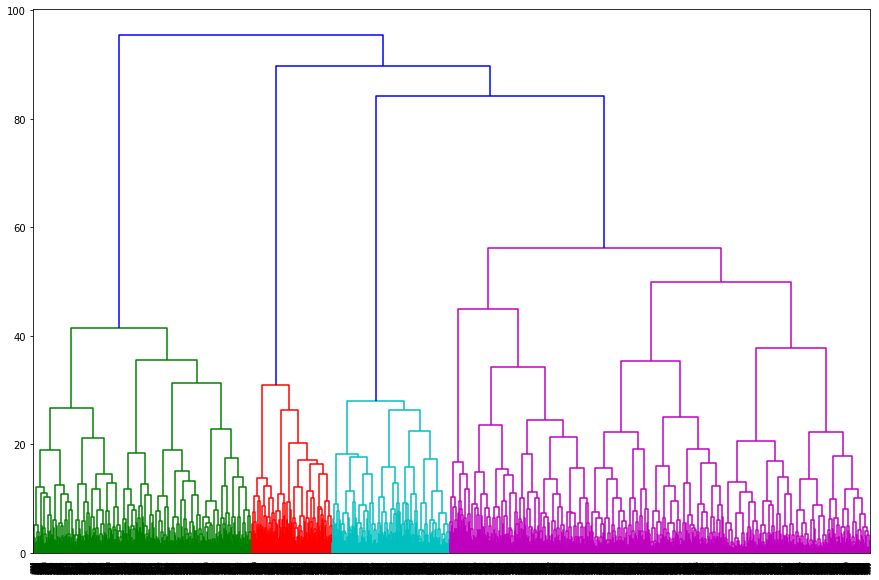

In [19]:
# дендрограмма
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

**При построении дендрограммы мы получили 5 кластеров**

In [20]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений 
labels = km.fit_predict(x_sc)

In [21]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

**Средние значения признаков для кластеров**

In [22]:
gym.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
cluster_km,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


По среднему Churn самый высокий показатель у кластера №3, а самый низкий показатель оттока у кластера №0

###  Распределения признаков для кластеров

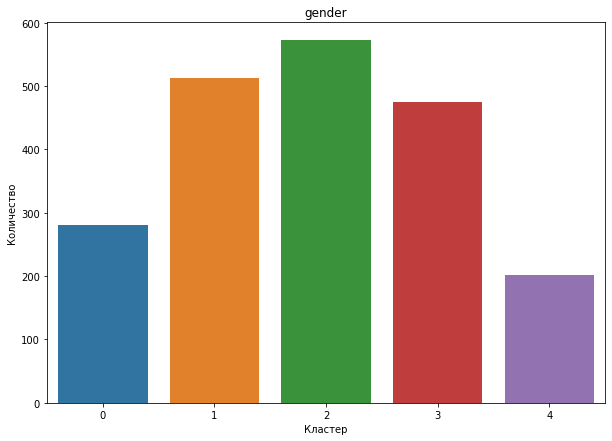

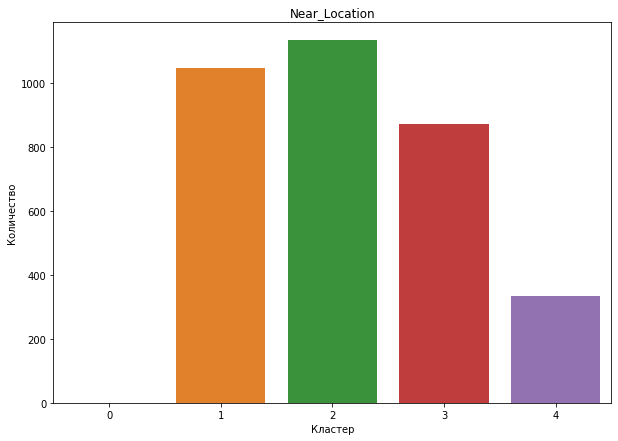

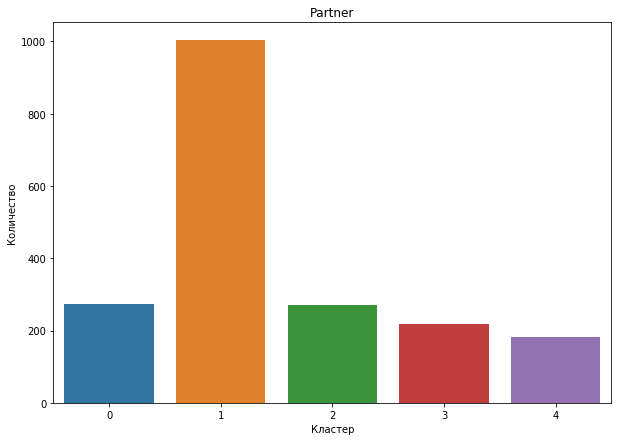

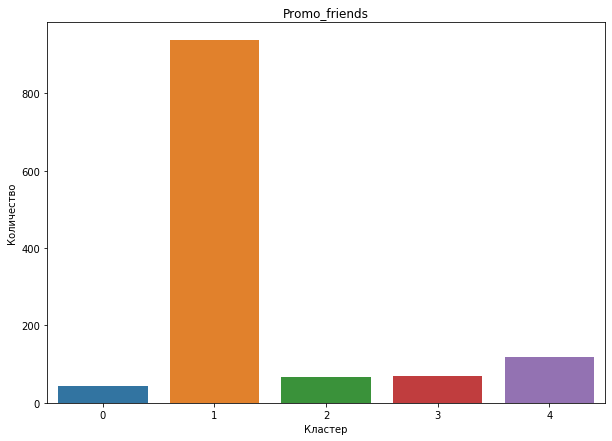

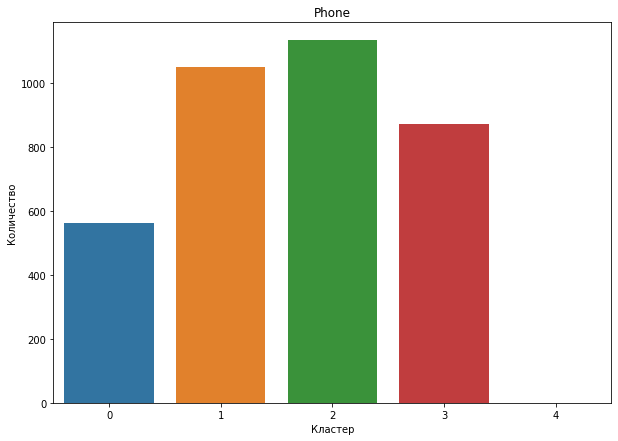

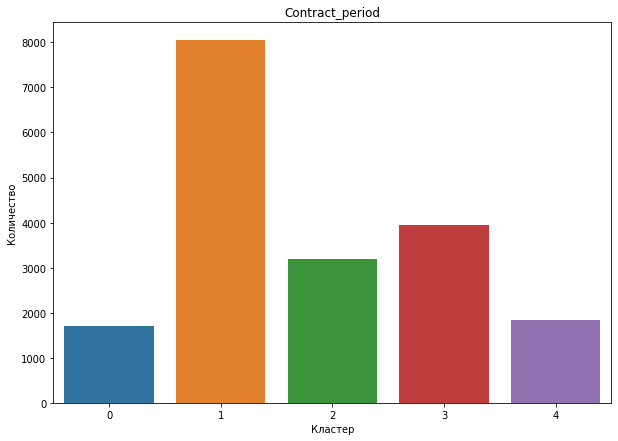

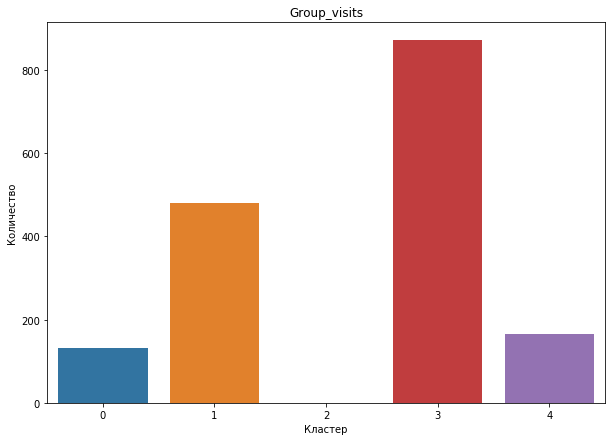

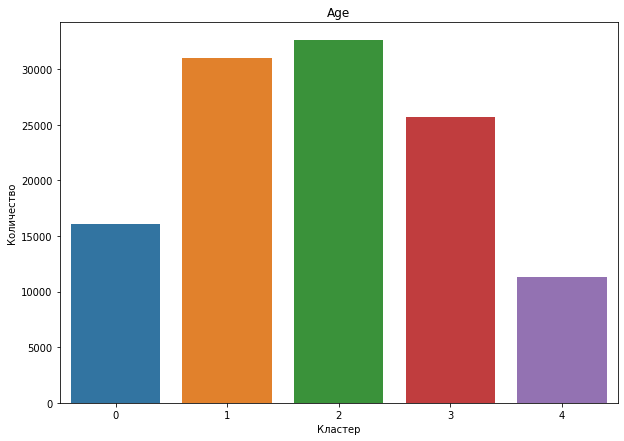

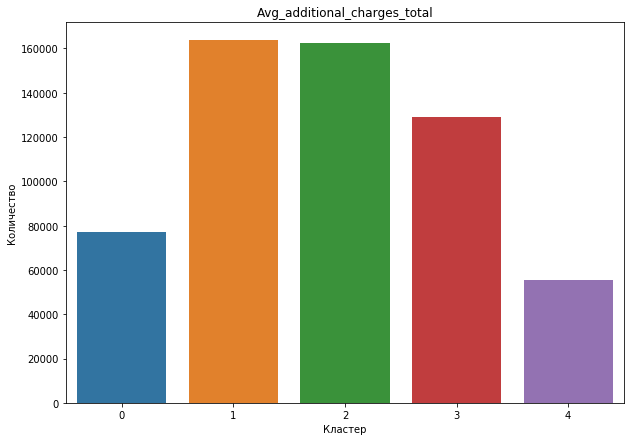

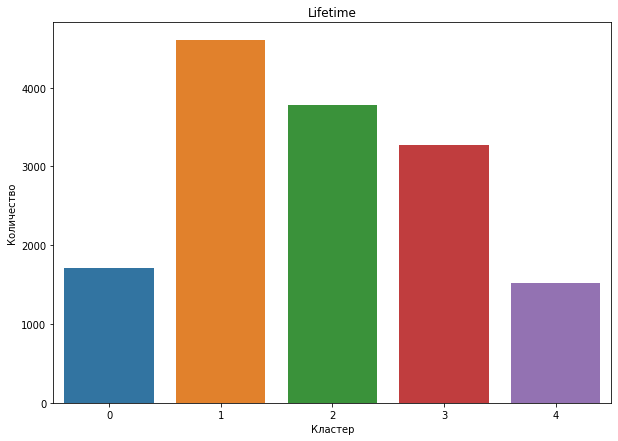

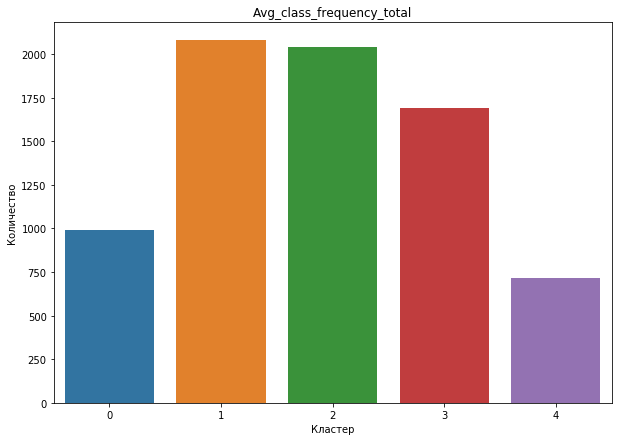

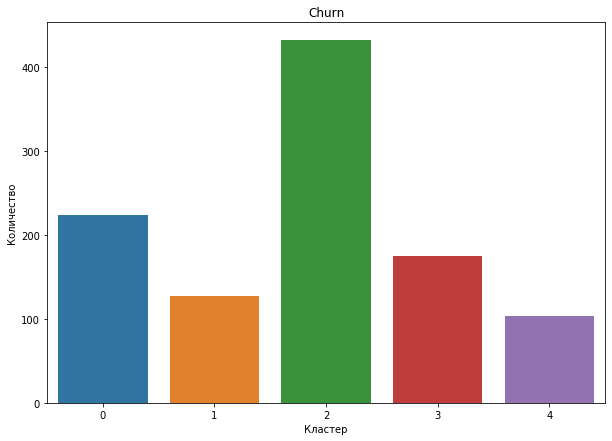

end


In [23]:
for column in gym.columns:
    if (column != 'cluster_km'):
        df = gym.groupby('cluster_km')[column].sum().reset_index()

        # Размер фигуры
        plt.figure(figsize=(10, 7))

        # График
        sns.barplot(
            x ="cluster_km", 
            y = column, 
            data=df).set(title = column, ylabel= 'Количество', xlabel = 'Кластер')
        plt.show()
    else:
        print('end')
        

По признакам: *'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age','Avg_additional_charges_total',  'Month_to_end_contract' и  'Lifetime'*  лучший - кластер №0, худший - кластер №1.  
По *'gender'* лучший - кластер №0, худший - кластер №2.  
По признакам *'Avg_class_frequency_total'и 'Avg_class_frequency_current_month'* лучший - кластер №0, худший - кластер №4  

In [24]:
gym.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total',
       'Churn', 'cluster_km'],
      dtype='object')

In [25]:
#Дискретные данные
discrete_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 'Contract_period']

#Непрерывные данные
other_columns  = ['Age', 'Avg_additional_charges_total', 'Lifetime', 'Avg_class_frequency_total']

end


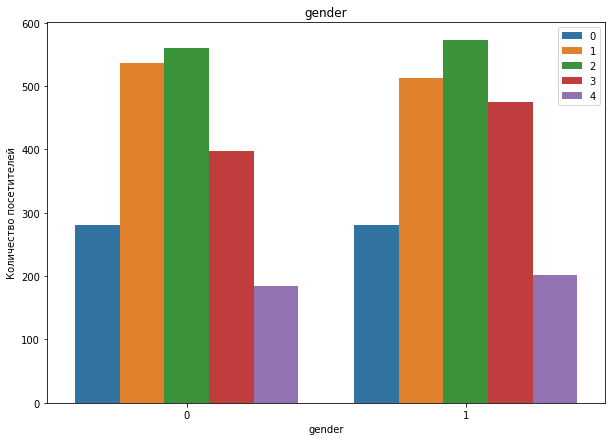

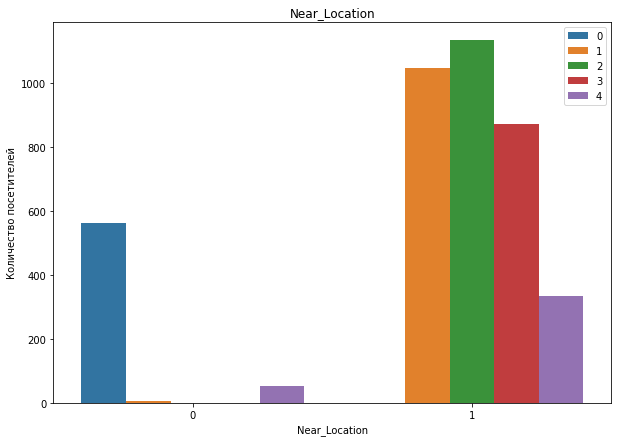

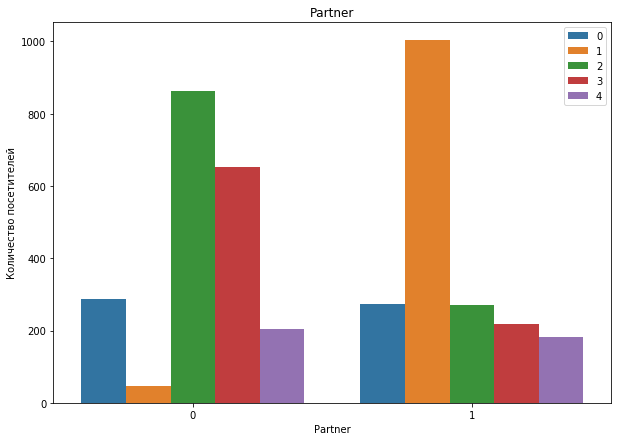

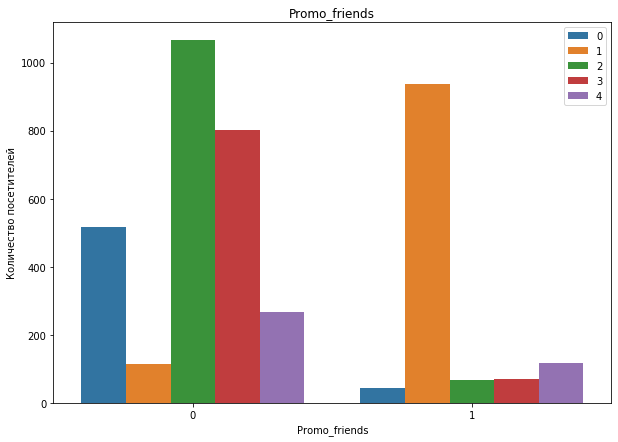

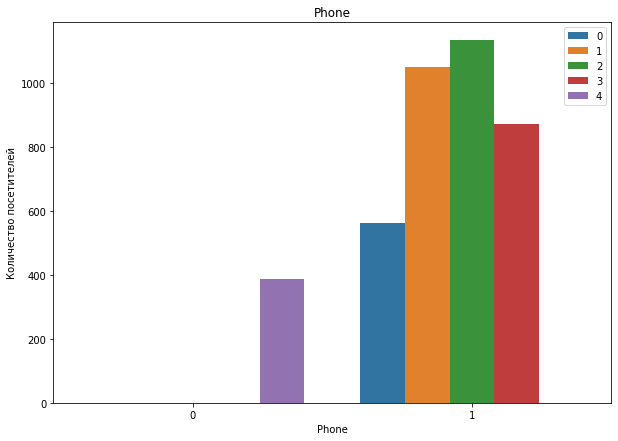

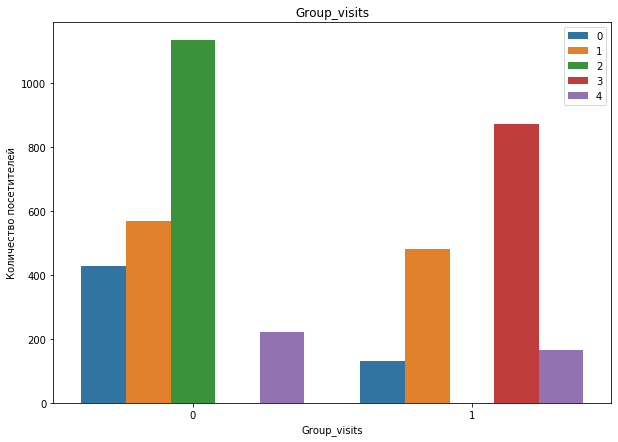

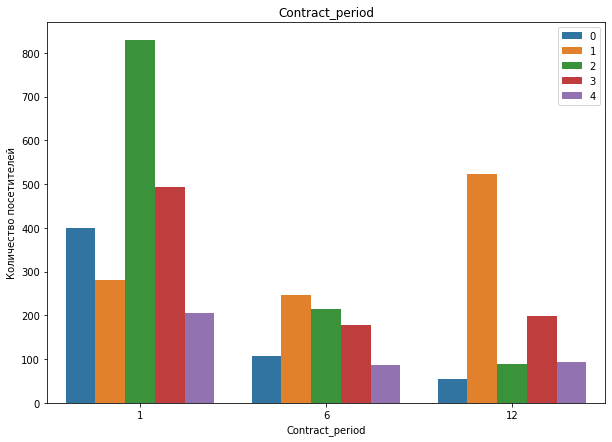

In [26]:
# Цикл для построения диаграмм дискретных данных

for column in discrete_columns:
    bar_width = 0.3
    plt.figure(figsize=(10,7))
    gym_for_cluster =  gym.groupby(['cluster_km', column])['Churn'].count().reset_index()
    sns.barplot(data = gym_for_cluster, y = 'Churn', x= column, hue = 'cluster_km')

    plt.legend(loc=1)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Количество посетителей')
    plt.show
else:
    print('end')

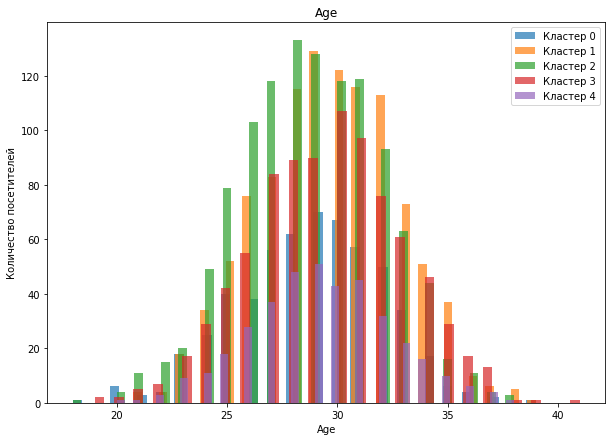

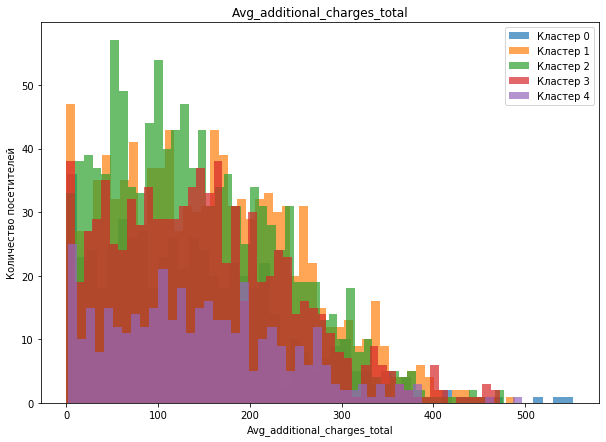

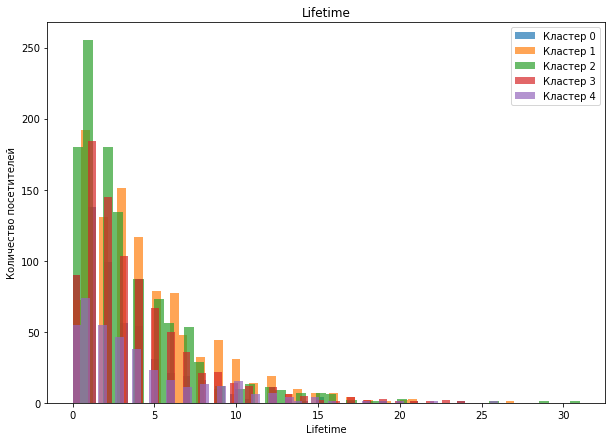

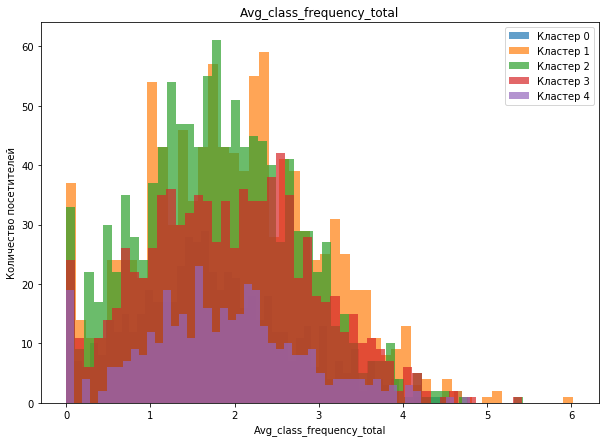

In [27]:
# Гистограммы непрерывных значений
for column in other_columns: 
    plt.figure(figsize=(10,7))
    for cluster in range(0, 5): 
        
        ax = gym.query('cluster_km == @cluster')[column].plot( kind='hist', bins= 50,
                                                              alpha = 0.7, label=('Кластер {}'.format(cluster))) 
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Количество посетителей')
        ax.legend() 
    plt.show()


In [28]:
# значение среднего оттока по кластерам
gym.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.399287
1    0.120952
2    0.381625
3    0.200918
4    0.266839
Name: Churn, dtype: float64

**Вывод**  
По среднему Churn самый низкий показатель у кластера №1, а самый высокий показатель оттока у кластера №0. Особенности кластеров: 
* Кластер №0: не содержит клиентов живущих поблизости от клуба, пришли не через акцию "Приведи друга", средний срок абонемента - 3 месяца.
* Кластер №1: почти полностью содержки клиентов, живущих/работающих рядом с клубом и являющимися  сотрудниками компании-партнёра. Клиенты чаще всего приходят в рамках предложения "Приведи друга" и имеют длительный период абонемента. 
* Кластер №2: Клиенты проживают/работают рядом с клубом, но пришли не по рекомендации, имеют короткий срок абонемента (меньше 3 месяцев)
* Кластер №3: Клиенты проживают/работают рядом с клубом, также как кластер №2 пришли в большинстве не в рамках предложения "Приведи друга", но имеют более длительные абонементы (больше 4 месяцев). Эти клиенты посещают групповые занятия
* Кластер №4: почти полностью содержки клиентов, живущих/работающих рядом с клубом, но они не оставляют свои номера телефонов. Имеют абонементы средней длительности


## Вывод

По средним значениям параметров можем сказать, что клиенты с близкой локацией к клубу реже попадают в отток. Средний срок абонементов 4,7 месяцев. Средний возраст клиентов, которые прекращают обслуживание, несколько ниже тех, кто продляет абонемент.
По признаку 'gender' мы можем сказать, что мужчины и женщины одинаково прекращают посещение фитнес-клуба.  
Принадлежность клиента к группе 'Partner' — сотрудник компании-партнёра клуба и факт первоначальной записи в рамках акции «приведи друга» повышает его вероятность продлить абонемент. По матрице корреляции мы отметили, что между этими параметрами высокий индекс корреляции.

Исходя из проведённого исследования, мы можем рекомендовать:

1) Большее внимание уделить партнерской программе и акции "Приведи друга". Возможно, оптимальным будет бонус в виде продления абонементов на больший срок.   
2) Также рекомендуется разработать тарифный планы, которые будут направлены на увеличение срока абонемента. То есть, чтобы клиенту было интереснее продлить абонемент на больший срок. Это могут быть бонусные занятия с тренером или подарочные сертификаты партнерской сети.  
3) Рекомендуется составить маркетинговую компания для аудитории 29-31 год.  
3) Следует обратить внимание на местоположение размещения рекламы и сосредоточиться на размещении наружной рекламы в районе фитнес-клуба. 
